In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('test_img.png', cv2.IMREAD_GRAYSCALE)
reference_img = cv2.imread('monkey.jpg', cv2.IMREAD_GRAYSCALE)

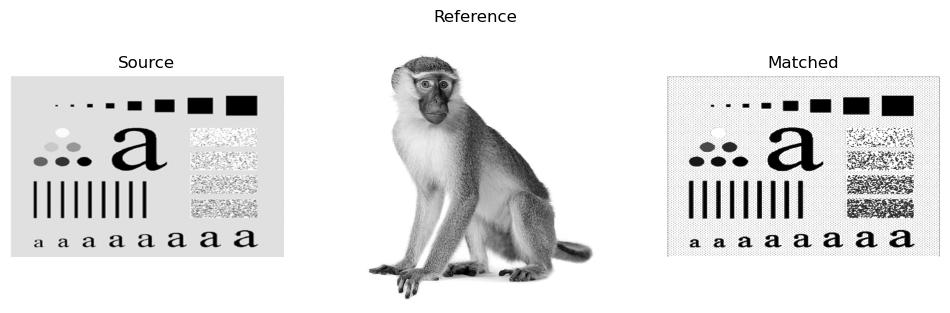

In [22]:
def histogram_match(source, reference):
    src_hist, bins = np.histogram(source.flatten(), 256, [0, 256])
    ref_hist, _ = np.histogram(reference.flatten(), 256, [0, 256])

    src_cdf = np.cumsum(src_hist).astype(np.float64)
    ref_cdf = np.cumsum(ref_hist).astype(np.float64)

    src_cdf = src_cdf / src_cdf[-1]
    ref_cdf = ref_cdf / ref_cdf[-1]

    mapping = np.zeros(256, dtype=np.uint8)
    ref_idx = 0
    for i in range(256):
        while ref_idx < 255 and ref_cdf[ref_idx] < src_cdf[i]:
            ref_idx += 1
        mapping[i] = ref_idx

    matched = mapping[source]
    return matched

# Usage:
matched_img = histogram_match(img, reference_img)

# Show the result
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.title("Source"); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(reference_img, cmap='gray'); plt.title("Reference"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(matched_img, cmap='gray'); plt.title("Matched"); plt.axis('off')
plt.show()

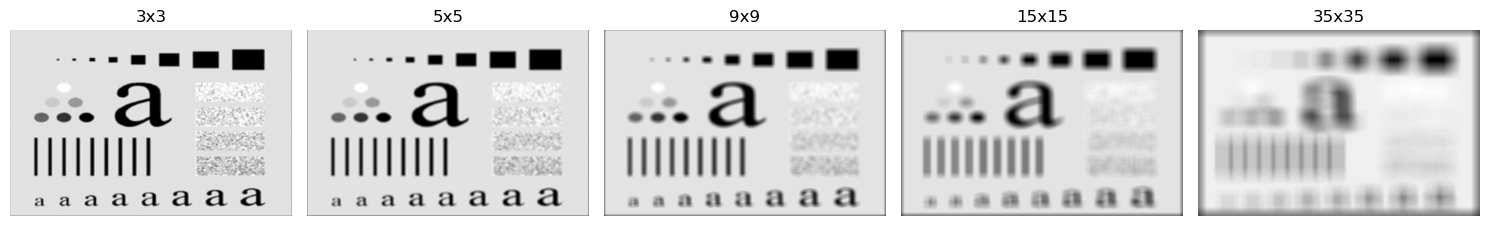

In [5]:
def mean_filter(img, ksize):
    pad = ksize // 2
    padded = np.pad(img, pad, mode='constant')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.mean(region)

    return output.astype(np.uint8)

# Example:
sizes = [3, 5, 9, 15, 35]
plt.figure(figsize=(15, 5))
for idx, k in enumerate(sizes):
    filtered = mean_filter(img, k)
    plt.subplot(1, len(sizes), idx+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"{k}x{k}")
    plt.axis('off')
plt.tight_layout()
plt.show()


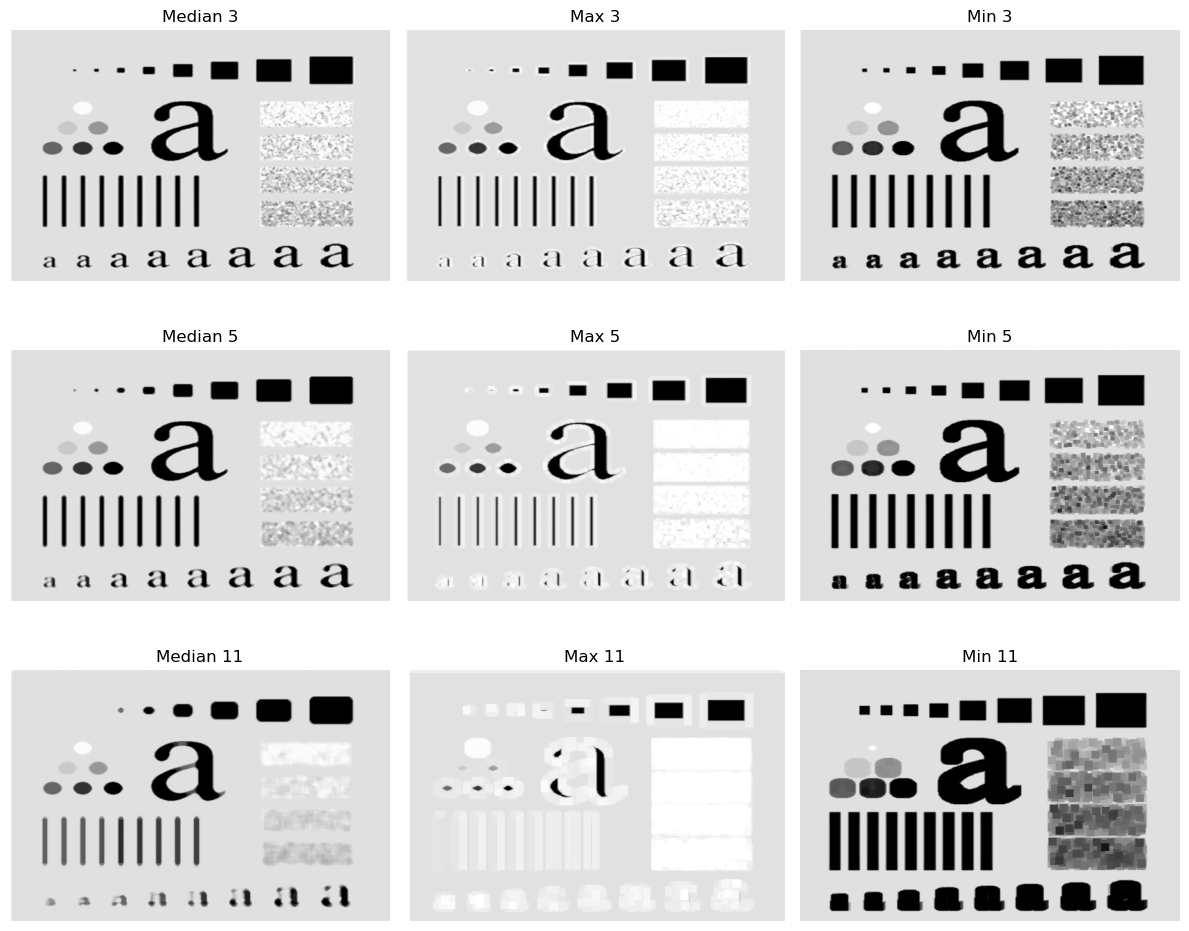

(None, None)

In [7]:
def median_filter(img, ksize):
    pad = ksize // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.median(region)
    return output

def max_filter(img, ksize):
    pad = ksize // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.max(region)
    return output

def min_filter(img, ksize):
    pad = ksize // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.min(region)
    return output

# Plot results
ksizes = [3, 5, 11]
fig, axs = plt.subplots(len(ksizes), 3, figsize=(12, 10))
for i, k in enumerate(ksizes):
    axs[i][0].imshow(median_filter(img, k), cmap='gray')
    axs[i][1].imshow(max_filter(img, k), cmap='gray')
    axs[i][2].imshow(min_filter(img, k), cmap='gray')
    axs[i][0].set_title(f'Median {k}')
    axs[i][1].set_title(f'Max {k}')
    axs[i][2].set_title(f'Min {k}')
    for j in range(3): axs[i][j].axis('off')
plt.tight_layout(), plt.show()


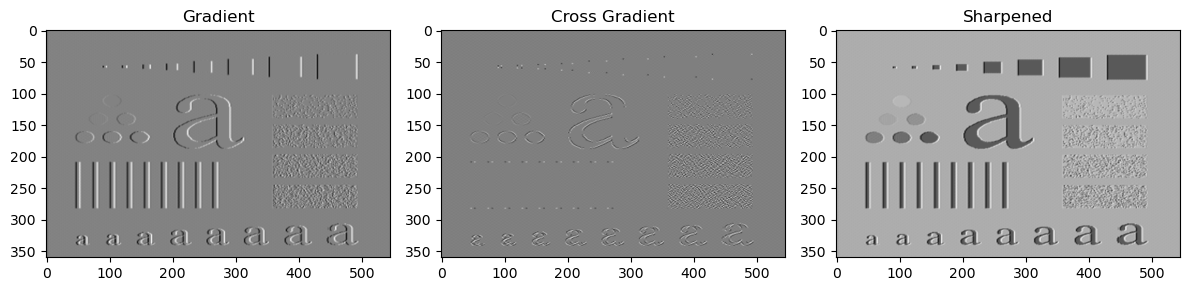

(None, None)

In [9]:
def apply_mask(img, mask):
    ksize = mask.shape[0]
    pad = ksize // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img, dtype=np.float64)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.sum(region * mask)
    return output

grad_mask = np.array([[-1, 1], [-1, 1]])
cross_grad_mask = np.array([[1, -1], [-1, 1]])

gradient = apply_mask(img, grad_mask)
cross_gradient = apply_mask(img, cross_grad_mask)
sharpened = img + gradient

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(gradient, cmap='gray'), plt.title("Gradient")
plt.subplot(1, 3, 2), plt.imshow(cross_gradient, cmap='gray'), plt.title("Cross Gradient")
plt.subplot(1, 3, 3), plt.imshow(sharpened, cmap='gray'), plt.title("Sharpened")
plt.tight_layout(), plt.show()


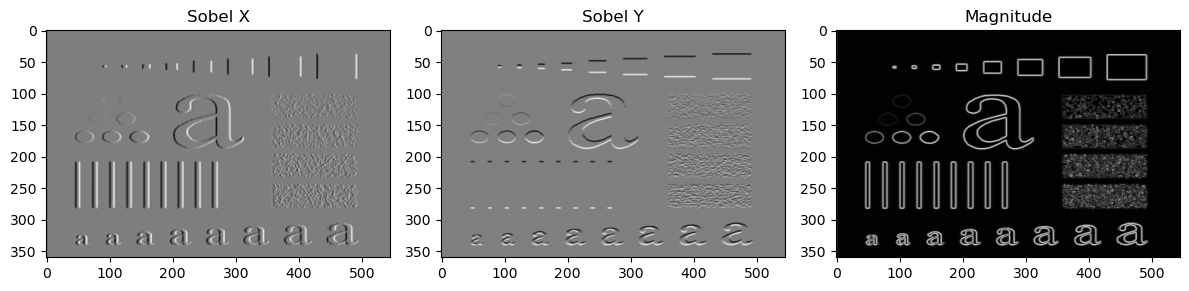

(None, None)

In [11]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

gx = apply_mask(img, sobel_x)
gy = apply_mask(img, sobel_y)
sobel_mag = np.sqrt(gx**2 + gy**2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(gx, cmap='gray'), plt.title("Sobel X")
plt.subplot(1, 3, 2), plt.imshow(gy, cmap='gray'), plt.title("Sobel Y")
plt.subplot(1, 3, 3), plt.imshow(sobel_mag, cmap='gray'), plt.title("Magnitude")
plt.tight_layout(), plt.show()


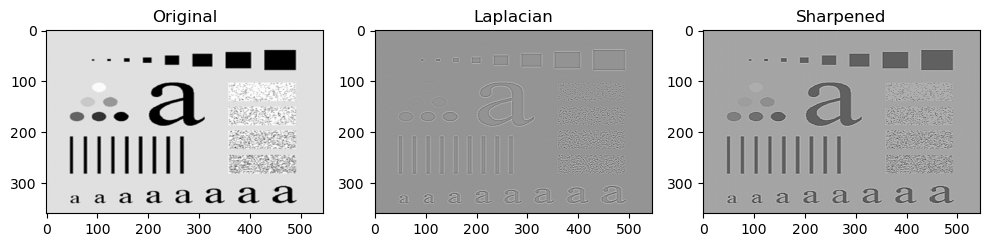

(None, None)

In [13]:
laplacian_mask = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacian_img = apply_mask(img, laplacian_mask)
sharpened_img = img + laplacian_img

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(laplacian_img, cmap='gray'), plt.title("Laplacian")
plt.subplot(1, 3, 3), plt.imshow(sharpened_img, cmap='gray'), plt.title("Sharpened")
plt.tight_layout(), plt.show()


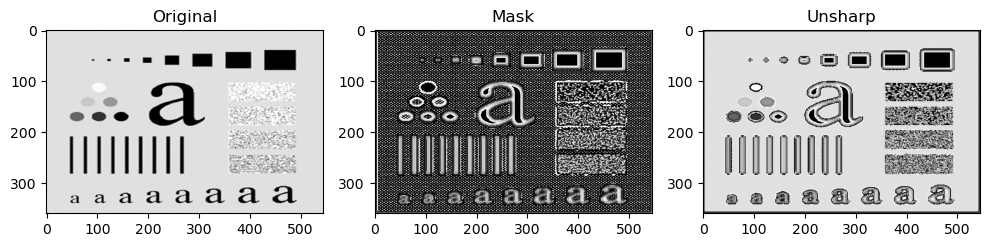

(None, None)

In [15]:
blurred = mean_filter(img, 9)
mask = img - blurred
unsharp = img + mask

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(mask, cmap='gray'), plt.title("Mask")
plt.subplot(1, 3, 3), plt.imshow(unsharp, cmap='gray'), plt.title("Unsharp")
plt.tight_layout(), plt.show()
